<a href="https://colab.research.google.com/github/Ivan1steer/ML_Final_Project/blob/main/ML_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
games = pd.read_csv('/content/drive/MyDrive/vgsales.csv')

In [ ]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
games.describe(include=['O'])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
games.isna().sum() / len(games)

,0
Rank,0.000000
Name,0.000000
Platform,0.000000
Year,0.016327
Genre,0.000000
Publisher,0.003494
NA_Sales,0.000000
EU_Sales,0.000000
JP_Sales,0.000000
Other_Sales,0.000000


In [ ]:
games.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Видим пустые значения в некоторых столбцах

<Axes: >

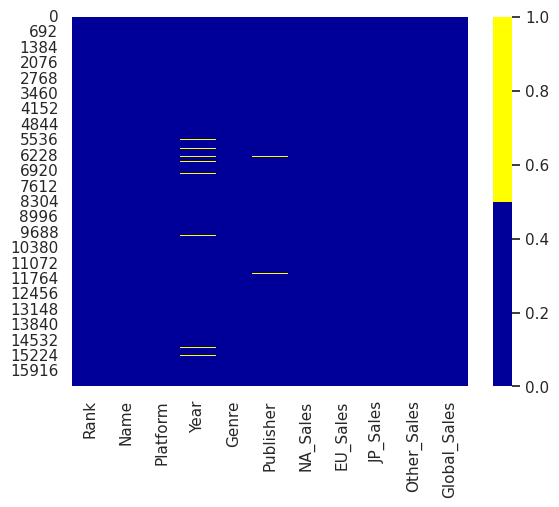

In [ ]:
cols = games.columns
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(games[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
med = games['Year'].median()
print(med)
games['Year'] = games['Year'].fillna(med)

2007.0


In [ ]:
games.dropna(axis=0, inplace=True)

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  float64
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<Axes: >

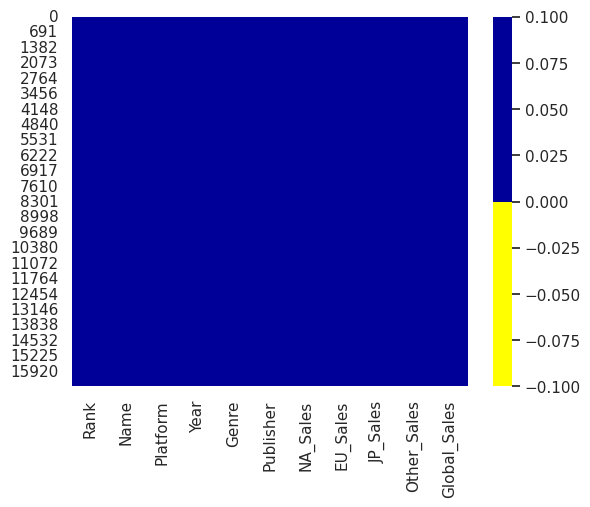

In [ ]:
cols = games.columns
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#ffff00', '#000099']
sns.heatmap(games[cols].isnull(), cmap=sns.color_palette(colours))

Шаг 2.

In [ ]:
numeric_games = games.select_dtypes(include=['number'])
numeric_games.drop("Rank",axis=1,inplace=True)
#Среднее
mean = numeric_games.mean()
# Мода
mode = numeric_games.mode().iloc[0]
# Медиана
median = numeric_games.median()
# Стандартное отклонение
std_dev = numeric_games.std()
# Квартили
quartiles = numeric_games.quantile([0.25, 0.5, 0.75])

# Объединение результатов в один DataFrame
descriptive_stats = pd.DataFrame({
    'Mean': mean,
    'Mode': mode,
    'Median': median,
    'Standard Deviation': std_dev,
    'Q1': quartiles.loc[0.25],
    'Q2': quartiles.loc[0.5],
    'Q3': quartiles.loc[0.75]
})

print(descriptive_stats)

                     Mean     Mode   Median  Standard Deviation       Q1  \
Year          2006.414510  2007.00  2007.00            5.788794  2003.00   
NA_Sales         0.265079     0.00     0.08            0.817929     0.00   
EU_Sales         0.146883     0.00     0.02            0.506129     0.00   
JP_Sales         0.077998     0.00     0.00            0.309800     0.00   
Other_Sales      0.048191     0.00     0.01            0.188879     0.00   
Global_Sales     0.538426     0.02     0.17            1.557424     0.06   

                   Q2       Q3  
Year          2007.00  2010.00  
NA_Sales         0.08     0.24  
EU_Sales         0.02     0.11  
JP_Sales         0.00     0.04  
Other_Sales      0.01     0.04  
Global_Sales     0.17     0.48  


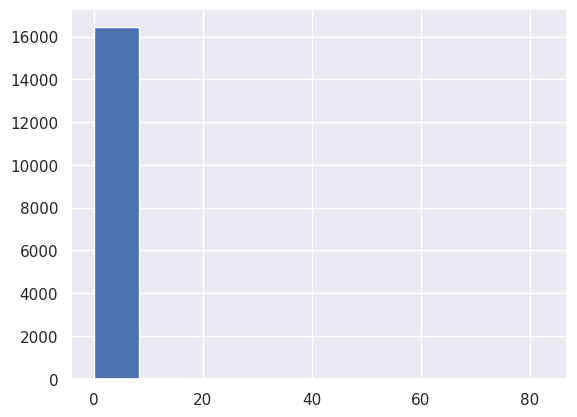

In [ ]:
games.Global_Sales.hist();

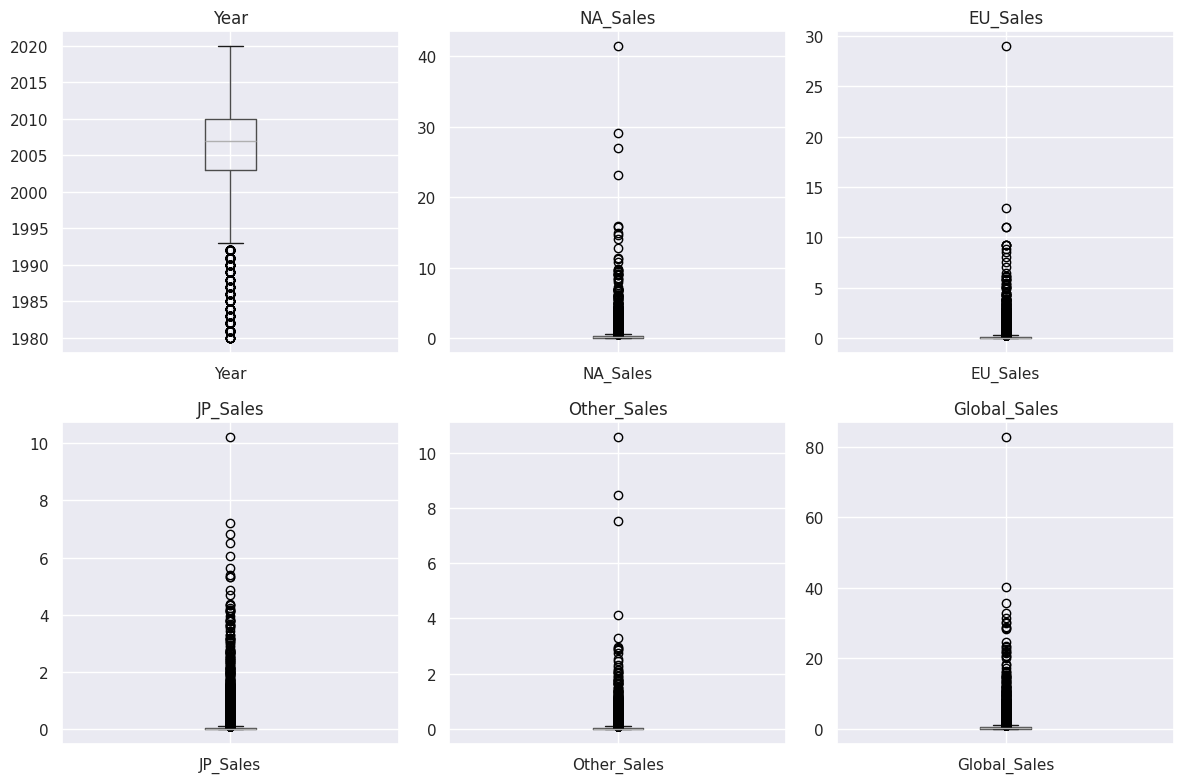

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_games.columns):
    games.boxplot(column=[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

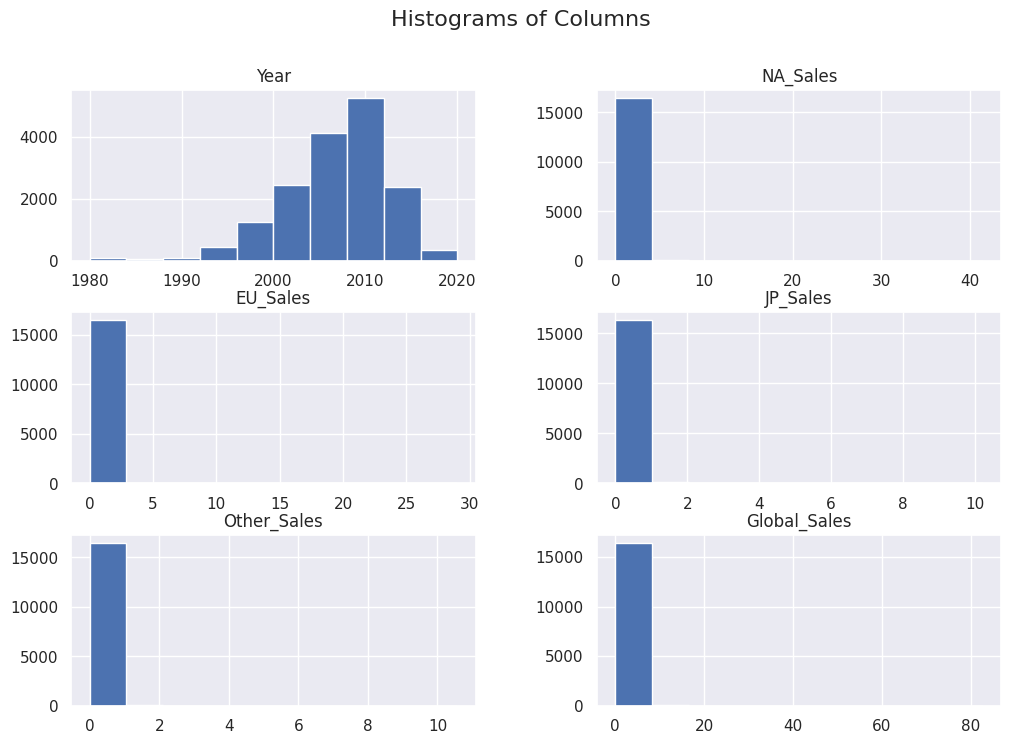

In [ ]:
numeric_games.hist(figsize=(12, 8), bins=10)
plt.suptitle('Histograms of Columns', fontsize=16)
plt.show()

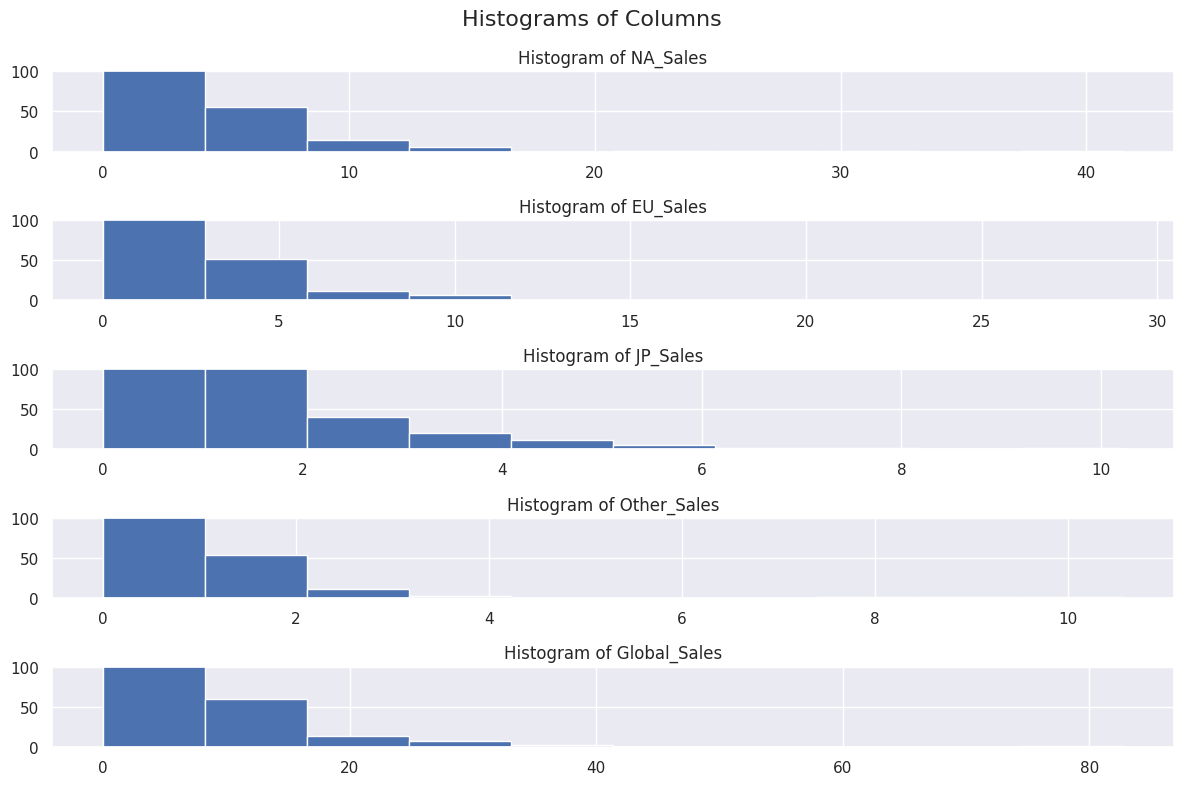

In [ ]:
fig, axes = plt.subplots(len(numeric_games.drop("Year", axis=1).columns), 1, figsize=(12, 8))

for i, col in enumerate(numeric_games.drop("Year", axis=1).columns):
    axes[i].hist(numeric_games[col], bins=10)
    axes[i].set_ylim(0, 100)
    axes[i].set_title(f'Histogram of {col}')

plt.suptitle('Histograms of Columns', fontsize=16)
plt.tight_layout()
plt.show()

Из всех колонок хоть немного похож на нормальное распределение только столбец Year

In [ ]:
import scipy.stats as stats
for col in numeric_games.columns:
  data = numeric_games[col]
  mu = np.mean(data)
  sigma = np.std(data)

  # Тест Колмогорова-Смирнова
  alpha = 0.05
  d_statistic, p_value = stats.kstest(data, 'norm', args=(mu, sigma))

  print('p-значение:', p_value)

  if p_value > alpha:
      print('Не удалось отвергнуть гипотезу о нормальности')
  else:
      print('Гипотеза о нормальности отвергнута')

p-значение: 1.342538279288666e-178
Гипотеза о нормальности отвергнута
p-значение: 0.0
Гипотеза о нормальности отвергнута
p-значение: 0.0
Гипотеза о нормальности отвергнута
p-значение: 0.0
Гипотеза о нормальности отвергнута
p-значение: 0.0
Гипотеза о нормальности отвергнута
p-значение: 0.0
Гипотеза о нормальности отвергнута


Заменим категориальные признаки количественными

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
games[['Platform', 'Genre', 'Publisher']] = enc.fit_transform(games[['Platform', 'Genre', 'Publisher']])
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26.0,2006.0,10.0,359.0,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11.0,1985.0,4.0,359.0,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26.0,2008.0,6.0,359.0,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26.0,2009.0,10.0,359.0,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5.0,1996.0,7.0,359.0,11.27,8.89,10.22,1.00,31.37


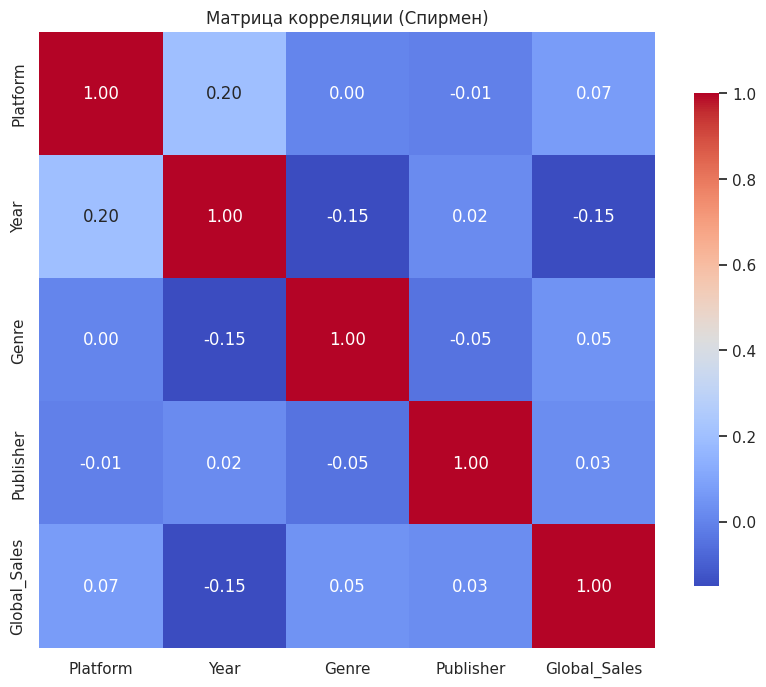

In [ ]:
correlation_matrix = games.drop(["Name", "Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], axis=1).corr(method='spearman')

# Визуализация с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляции (Спирмен)')
plt.show()

Есть подозрение на тренд, проверим с помощью теста Манна-Кендалла. В случае упорядоченности данных перемешаем их.

In [ ]:
from scipy.stats import kendalltau
from sklearn.utils import shuffle
correlation, p_value = kendalltau(range(len(games)), games['Global_Sales'])

alpha = 0.05
print(f"Корреляция Манна-Кендалла: {correlation:.3f}")
print(f"p-значение: {p_value:.3f}")

if p_value < alpha:
    print("Данные, вероятно, упорядочены.")
    games = shuffle(games)
    print("Данные перемешаны.")
else:
    print("Данные, вероятно, неупорядочены.")

Корреляция Манна-Кендалла: -0.990
p-значение: 0.000
Данные, вероятно, упорядочены.
Данные перемешаны.


In [ ]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7272,7274,NBA 06,19.0,2005.0,10.0,456.0,0.20,0.00,0.00,0.02,0.22
3882,3884,The LEGO Movie Videogame,30.0,2014.0,0.0,549.0,0.34,0.13,0.00,0.04,0.51
117,118,Zumba Fitness,26.0,2010.0,10.0,6.0,3.50,2.64,0.00,0.67,6.81
14582,14585,HappinessCharge PreCure! Kawarun Collection,2.0,2014.0,3.0,347.0,0.00,0.00,0.03,0.00,0.03
10654,10656,NBA Ballers: Rebound,19.0,2006.0,10.0,325.0,0.09,0.00,0.00,0.01,0.10


Убедимся, что данные больше не упорядочены.

In [ ]:
correlation, p_value = kendalltau(range(len(games)), games['Global_Sales'])

alpha = 0.05
print(f"Корреляция Манна-Кендалла: {correlation:.3f}")
print(f"p-значение: {p_value:.3f}")

if p_value < alpha:
    print("Данные, вероятно, упорядочены.")
else:
    print("Данные, вероятно, неупорядочены.")

Корреляция Манна-Кендалла: 0.010
p-значение: 0.059
Данные, вероятно, неупорядочены.


Шаг 3

Напишем функцию, которая вычислит метрики для моделей.
Как RMSE, так и R-квадрат количественно определяют, насколько хорошо модель линейной регрессии соответствует набору данных. При оценке того, насколько хорошо модель соответствует набору данных, полезно вычислить как RMSE, так и значение R2, поскольку каждая метрика говорит нам что-то свое.

* **RMSE** сообщает нам типичное расстояние между прогнозируемым значением, полученным с помощью модели регрессии, и фактическим значением.

* **R2** сообщает нам, насколько хорошо переменные-предикторы могут объяснить вариацию в целевой переменной.

Добавление большего количества независимых переменных или предикторов в модель регрессии, как правило, увеличивает значение R2, что побуждает создателей модели добавлять еще больше переменных. **Скорректированный R2** используется для определения того, насколько надежна корреляция и насколько она определяется добавлением независимых переменных. Он всегда ниже, чем R2.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]

    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

Разделим данные на трейновые и тестовые

In [ ]:
min_threshold = 0
max_threshold = 20

games = games[(games['Global_Sales'] >= min_threshold) & (games['Global_Sales'] <= max_threshold)]
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7272,7274,NBA 06,19.0,2005.0,10.0,456.0,0.20,0.00,0.00,0.02,0.22
3882,3884,The LEGO Movie Videogame,30.0,2014.0,0.0,549.0,0.34,0.13,0.00,0.04,0.51
117,118,Zumba Fitness,26.0,2010.0,10.0,6.0,3.50,2.64,0.00,0.67,6.81
14582,14585,HappinessCharge PreCure! Kawarun Collection,2.0,2014.0,3.0,347.0,0.00,0.00,0.03,0.00,0.03
10654,10656,NBA Ballers: Rebound,19.0,2006.0,10.0,325.0,0.09,0.00,0.00,0.01,0.10


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16520 entries, 7272 to 15794
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16520 non-null  int64  
 1   Name          16520 non-null  object 
 2   Platform      16520 non-null  float64
 3   Year          16520 non-null  float64
 4   Genre         16520 non-null  float64
 5   Publisher     16520 non-null  float64
 6   NA_Sales      16520 non-null  float64
 7   EU_Sales      16520 non-null  float64
 8   JP_Sales      16520 non-null  float64
 9   Other_Sales   16520 non-null  float64
 10  Global_Sales  16520 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
from sklearn.preprocessing import RobustScaler
# Создание экземпляра RobustScaler
scaler = RobustScaler()
# Применение RobustScaler к данным
games[['rsPlatform','rsGenre', 'rsPublisher', 'rsGlobal_Sales']] = scaler.fit_transform(games[['Platform','Genre', 'Publisher', 'Global_Sales']])
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rsPlatform,rsGenre,rsPublisher,rsGlobal_Sales
7272,7274,NBA 06,19.0,2005.0,10.0,456.0,0.20,0.00,0.00,0.02,0.22,0.214286,0.714286,0.414330,0.121951
3882,3884,The LEGO Movie Videogame,30.0,2014.0,0.0,549.0,0.34,0.13,0.00,0.04,0.51,1.000000,-0.714286,0.704050,0.829268
117,118,Zumba Fitness,26.0,2010.0,10.0,6.0,3.50,2.64,0.00,0.67,6.81,0.714286,0.714286,-0.987539,16.195122
14582,14585,HappinessCharge PreCure! Kawarun Collection,2.0,2014.0,3.0,347.0,0.00,0.00,0.03,0.00,0.03,-1.000000,-0.285714,0.074766,-0.341463
10654,10656,NBA Ballers: Rebound,19.0,2006.0,10.0,325.0,0.09,0.00,0.00,0.01,0.10,0.214286,0.714286,0.006231,-0.170732


In [ ]:
games_copy = games
games_copy['rsGlobal_Sales'] = np.log1p(games_copy['rsGlobal_Sales'])
X = games_copy[['rsPlatform', 'rsGenre', 'rsPublisher']]
y = games_copy['rsGlobal_Sales']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (16520, 3) | y shape: (16520,) 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

Начнем создание моделей

In [ ]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pr_LR = modelLR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  0.7043
  R2: 0.0091
 Adjusted R2: 0.0082
 Cross Validated R2: 0.0051


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
modelPR = LinearRegression()
modelPR.fit(X_p_train, y_p_train)
y_pr_PR = modelPR.predict(X_p_test)
_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  0.7111
  R2: 0.0245
 Adjusted R2: 0.0207
 Cross Validated R2: 0.0214


In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_dt_pred = modelDT.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.6169
  R2: 0.2396
 Adjusted R2: 0.2389
 Cross Validated R2: 0.2114


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
modelRF = RandomForestRegressor(n_estimators=100, random_state=14, max_depth=10,min_samples_split=4, min_samples_leaf=3)
modelRF.fit(X_train, y_train)
y_rf_pred = modelRF.predict(X_test)
mae = mean_absolute_error(y_test, y_rf_pred)
_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.5884
  R2: 0.3082
 Adjusted R2: 0.3076
 Cross Validated R2: 0.3029


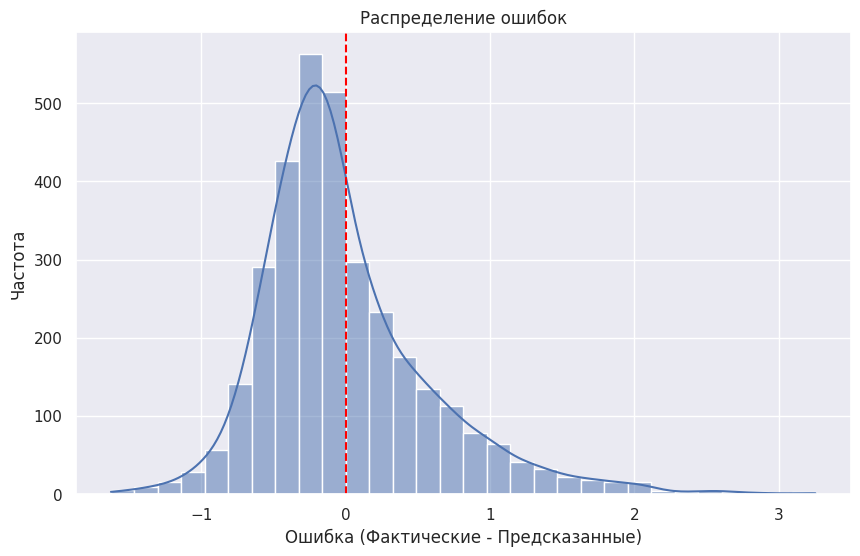

In [ ]:
errors = y_test - y_rf_pred
# Гистограмма распределения ошибок
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title("Распределение ошибок")
plt.xlabel("Ошибка (Фактические - Предсказанные)")
plt.ylabel("Частота")
plt.axvline(0, color='red', linestyle='--')  # Линия нуля
plt.show()

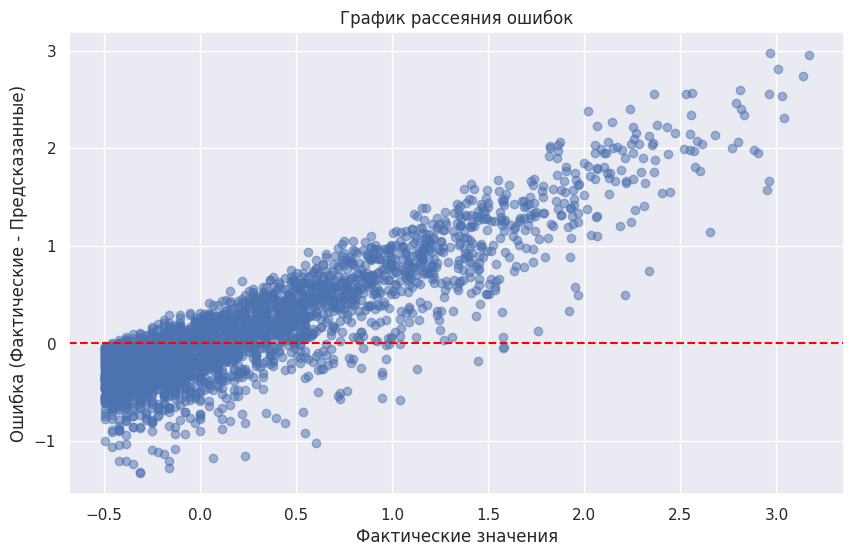

In [ ]:
errors = np.expm1(y_test) - np.expm1(y_rf_pred)
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test), errors, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Линия нуля
plt.title("График рассеяния ошибок")
plt.xlabel("Фактические значения")
plt.ylabel("Ошибка (Фактические - Предсказанные)")
plt.show()

In [ ]:
games_copy = games
games_copy['Global_Sales'] = np.log1p(games_copy['Global_Sales'])
X = games_copy[['Platform', 'Genre', 'Publisher', 'EU_Sales']]
y = games_copy['Global_Sales']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (16520, 4) | y shape: (16520,) 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
from sklearn.linear_model import LinearRegression

# Создадим модель линейной регрессии
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pr_LR = modelLR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.4783
  R2: 0.6634
 Adjusted R2: 0.663
 Cross Validated R2: 0.6251


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
# Create a linear regression model
modelPR = LinearRegression()
# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)
# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)
_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  0.1868
  R2: 0.7725
 Adjusted R2: 0.7709
 Cross Validated R2: 0.7532


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.1934
  R2: 0.7384
 Adjusted R2: 0.7381
 Cross Validated R2: 0.6987


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100, random_state=14, max_depth=10,min_samples_split=4, min_samples_leaf=3)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


mae = mean_absolute_error(y_test, y_rf_pred)
_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.1934
  R2: 0.8364
 Adjusted R2: 0.8362
 Cross Validated R2: 0.8127


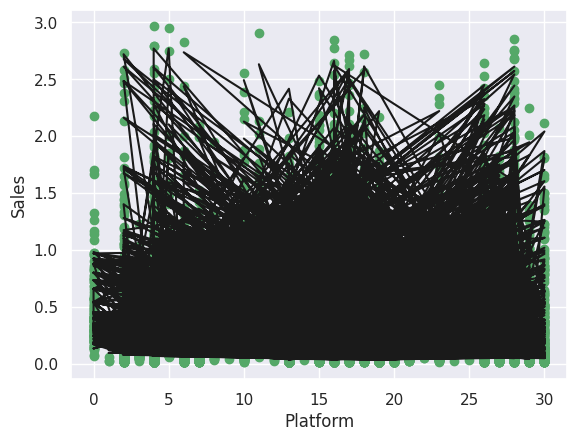

In [ ]:
X2 = games_copy['Platform'].values[:,np.newaxis]
y2 = games_copy['Global_Sales'].values

plt.scatter(X2, y2,color='g')
plt.plot(X_train['Platform'], modelRF.predict(X_train),color='k')
plt.ylabel('Sales', size=12)
plt.xlabel('Platform', size=12)
plt.show()